In [101]:
import pandas as pd
import numpy as np

import os, re, nltk, spacy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# load all the files from folders & find the total number of files

In [62]:
pos_files = os.listdir('positive/')
neg_files = os.listdir('negative/')

len(pos_files), len(neg_files)

(10000, 8000)

In [63]:
# list the names of some of the files

In [64]:
print(pos_files[:10], '\n')  
print(neg_files[:10]) 

['12390_8.txt', '8329_7.txt', '9063_8.txt', '3092_10.txt', '9865_8.txt', '10460_10.txt', '10331_10.txt', '11606_10.txt', '6168_10.txt', '3225_10.txt'] 

['1821_4.txt', '10402_1.txt', '5392_3.txt', '2682_3.txt', '399_2.txt', '10447_1.txt', '10096_1.txt', '11890_1.txt', '6435_3.txt', '3253_3.txt']


In [65]:
# create a function to read the files

In [66]:
def read_review(filename):
    file = open(filename, mode='rt', encoding='utf-8') # read mode
    text = file.read() # reading the text
    file.close()
    
    return text

In [67]:
# read and store positive & negative reviews in lists

In [68]:
pos=[]; neg=[]

for i in pos_files:
    pos.append(read_review("positive/"+i))
    
for i in neg_files:
    neg.append(read_review("negative/"+i))

In [69]:
# create a dataframe & add pos,neg lists to it

In [70]:
df = pd.DataFrame({'review': (pos+neg)})
df.head(2)

,review
0,Bizarre horror movie filled with famous faces ...
1,"A solid, if unremarkable film. Matthau, as Ein..."


In [71]:
df.shape

(18000, 1)

In [72]:
df['review'][4] # positive review

'I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know the children all liked it. There parents also seemed engaged. The death and apparent death of characters brought about the appropriate gasps and comments. Hopefully people realize this movie was made for kids. As such, it was successful although I liked it too. Personally I liked the Scrat!!'

In [73]:
df['review'][17999] # negative review 

'Not that I dislike childrens movies, but this was a tearjerker with few redeeming qualities. M.J. Fox was the perfect voice for Stuart and the rest of the talent was wasted. Hugh Laurie can be amazingly funny, but is not given the chance in this movie. It´s sugar-coated sugar and would hardly appeal to anyone over 7 years of age. See Toy Story, Monsters Inc. or Shrek instead. 3/10'

In [15]:
# as we can see from len,shape above first 10000 are pos reviews & next 8000 are neg, now assign class

In [74]:
df['class'] = 'neg'
df['class'][:10000] = 'pos'

In [75]:
df['class'].value_counts()

pos    10000
neg     8000
Name: class, dtype: int64

In [76]:
# remove empty strings

In [77]:
blanks = []

# index,review,class
for i,rv,cl in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [78]:
blanks
# df.drop(blanks, inplace=True)

[]

In [79]:
# replacing punctuations & html tags from reviews

In [80]:
df['review'][4]

'I saw the movie with two grown children. Although it was not as clever as Shrek, I thought it was rather good. In a movie theatre surrounded by children who were on spring break, there was not a sound so I know the children all liked it. There parents also seemed engaged. The death and apparent death of characters brought about the appropriate gasps and comments. Hopefully people realize this movie was made for kids. As such, it was successful although I liked it too. Personally I liked the Scrat!!'

In [81]:
def cleanText(rep_text):
    rep_text = re.sub(r'(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])', '', rep_text) 
    # removing punctuations
    
    rep_text = re.sub(r'(<br\s*/><br\s*/>)|(\-)|(\/)', '', rep_text) 
    # removing html tags
    
    return rep_text.lower()

In [82]:
df['review'] = df['review'].apply(cleanText)
df['review'][4]

'i saw the movie with two grown children although it was not as clever as shrek i thought it was rather good in a movie theatre surrounded by children who were on spring break there was not a sound so i know the children all liked it there parents also seemed engaged the death and apparent death of characters brought about the appropriate gasps and comments hopefully people realize this movie was made for kids as such it was successful although i liked it too personally i liked the scrat'

In [ ]:
# wordcloud

(-0.5, 499.5, 299.5, -0.5)

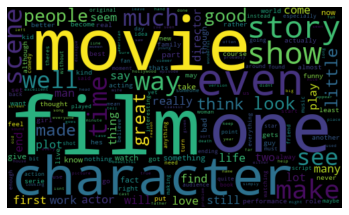

In [102]:
allWords = ' '.join([i for i in df['review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off');

In [83]:
# train test split

In [84]:
X = df['review']
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(12600,)

In [85]:
# count vectorizer => fit & transform data (build a vocab, count the number of words)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
# count_vect.fit(X_train) # fit
# X_train_counts = count_vect.transform(X_train) # transform

X_train_counts = count_vect.fit_transform(X_train) # fitting and transforming in a single step
X_train_counts.shape # this means we had 12600 rows but now we 93459 words across these rows

(12600, 93459)

In [87]:
# tfidf transformer

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer() 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [89]:
# now combining the two previous steps of tfidf and count vectorization

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [91]:
# train a classifier

In [92]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [93]:
# build a pipeline (combining all the above steps after train test split) 

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [95]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

text_clf.fit(X_train, y_train)
pred = text_clf.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score: ', round(accuracy_score(y_test, pred)*100,2)) 
print('\n')
print('Classification Report: ', '\n', '\n', classification_report(y_test, pred))
print('\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, pred))

Accuracy Score:  88.39


Classification Report:  
 
               precision    recall  f1-score   support

         neg       0.89      0.84      0.86      2376
         pos       0.88      0.92      0.90      3024

    accuracy                           0.88      5400
   macro avg       0.88      0.88      0.88      5400
weighted avg       0.88      0.88      0.88      5400



Confusion Matrix:  
 [[2004  372]
 [ 255 2769]]


In [97]:
# predict on new reviews

In [98]:
text_clf.predict(["this movie was amazing"])

array(['pos'], dtype=object)

In [99]:
text_clf.predict(["Absolutely the BEST show on Netflix currently. It is so so deep, that is not for the weak-minded. If you want mindless action, there is Punisher. If you want candy-pop pseudo sci-fi, there is Stranger Things. If you really want to see/witness the dark underbelly of the drug cartels, there is Narcos. But none for the ones who want to scratch their heads and understand how time works. This is by far the only show that had the audacity to show paradoxes and not just talk about them"])

array(['pos'], dtype=object)

In [100]:
text_clf.predict(["shit movie"])

array(['neg'], dtype=object)